## Problem Statement Description
The image below contains a microfluidic arena that contains many worms as well as bubbles. The goal of the project is to apply the concepts and techniques learned in the course to (A) Take a dataset of unlabelled images and classify them into suitable classes (B) Develop a machine learning model based on logistic regression to classify the labelled data set.

## Part A: (60 points)
You are provided a data set of 120 unlabelled sub-images extracted from videos of the microfluidic arena. Below you can see the different types of sub-images present in the provided set. Using data science techniques learned in class, the objective is to identify how many different classes of images are present in the data set and assign a class label to each sub-image. Your results should show data reduction and clustering approaches along with how you are identifying the classes and assigning labels.
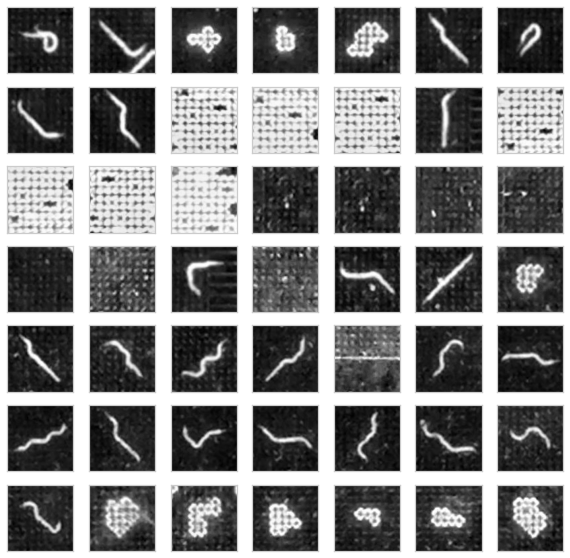

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
from skimage import color
import glob

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter, defaultdict

from sklearn.decomposition import PCA
# from sklearn import manifold
# from sklearn import preprocessing
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import Birch

In [2]:
path = 'Problem 1 - Images'
imgList = []
for img in glob.glob(path + "/*.png"):
    imgList.append(color.rgb2gray(cv2.cv2.imread(img)).flatten())

In [3]:
np.array(imgList).shape

(120, 10201)

In [30]:
101*101

10201

# Data Reduction

[0.75760103 0.79107645 0.81064709 0.82710621 0.84065397 0.8524216
 0.86150957 0.86948213 0.87646218 0.88288179 0.88864936 0.89348302
 0.89829129 0.90284219 0.90702842 0.9111143  0.91485592 0.91819779
 0.92151582 0.92477214 0.92777543 0.93053548 0.93320399 0.9356817
 0.93809983 0.94044904 0.94264805 0.94477074 0.94678196 0.94873043
 0.95059073 0.95241163 0.95407183 0.95572134 0.95728055 0.95878647
 0.96022278 0.96163906 0.96303262 0.96435219 0.96556718 0.96675451
 0.96793532 0.96907062 0.97019374 0.97123479 0.97223928 0.9732363
 0.97422065 0.97516464 0.97608112 0.97697621 0.97784124 0.97866918
 0.97947564 0.98027594 0.9810353  0.98176299 0.98247878 0.98317894
 0.98385235 0.98450749 0.98514689 0.98576687 0.9863616  0.98694339
 0.98751265 0.98806771 0.9886035  0.98911264 0.98959216 0.99005993
 0.99051895 0.99096096 0.99139784 0.99182138 0.99223576 0.99264052
 0.99303786 0.99340742 0.99376545 0.99411473 0.9944607  0.99478942
 0.99509747 0.99539842 0.99569612 0.99598442 0.99625628 0.9965247

'We continue with #pca of 30 which represents 95% of data information.'

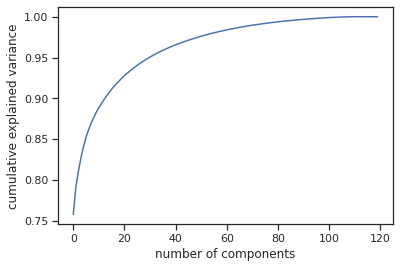

In [6]:

pca = PCA().fit(np.array(imgList))

print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

'''We continue with #pca of 30 which represents 95% of data information.'''

In [7]:
#Import required modules
 
pca = PCA(30) # we need 2 principal components.
converted_data = pca.fit_transform(np.array(imgList))
converted_data.shape

(120, 30)

In [8]:
#### kmeans algorithm
### Choosing best Num cluster for KMeans
for NumbOfcluster in range(2, 10):
    kmean = KMeans(n_clusters=NumbOfcluster, max_iter=200)
    kmean.fit(np.array(imgList))
    labels = kmean.labels_
    KMeans_Sil = metrics.silhouette_score(converted_data, kmean.labels_, metric='euclidean')
    print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.5856010129718758
Kmeans silhouette  0.5648500541395121
Kmeans silhouette  0.3355541651535189
Kmeans silhouette  0.34957105969691377
Kmeans silhouette  0.17790694885738567
Kmeans silhouette  0.19155888009623503
Kmeans silhouette  0.21652961759340045
Kmeans silhouette  0.25589505421340203


In [9]:
NumbOfcluster = 3

In [10]:
kmean = KMeans(n_clusters=NumbOfcluster, max_iter=200)
kmean.fit(X = converted_data)

KMeans(max_iter=200, n_clusters=3)

In [11]:
labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(converted_data, kmean.labels_, metric='euclidean')
print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.5648500541395121


In [12]:
df = []

for i in range(NumbOfcluster):
    newdata = np.array(imgList)[kmean.labels_==i]
    print(newdata.shape)
    print('Label of ',i ,' has ', len(newdata[:,0])/len(converted_data[:,0])," ratio of whole data")


(50, 10201)
Label of  0  has  0.4166666666666667  ratio of whole data
(61, 10201)
Label of  1  has  0.5083333333333333  ratio of whole data
(9, 10201)
Label of  2  has  0.075  ratio of whole data


In [13]:
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])

pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(np.array(imgList))
X_PCA.shape

(120, 2)

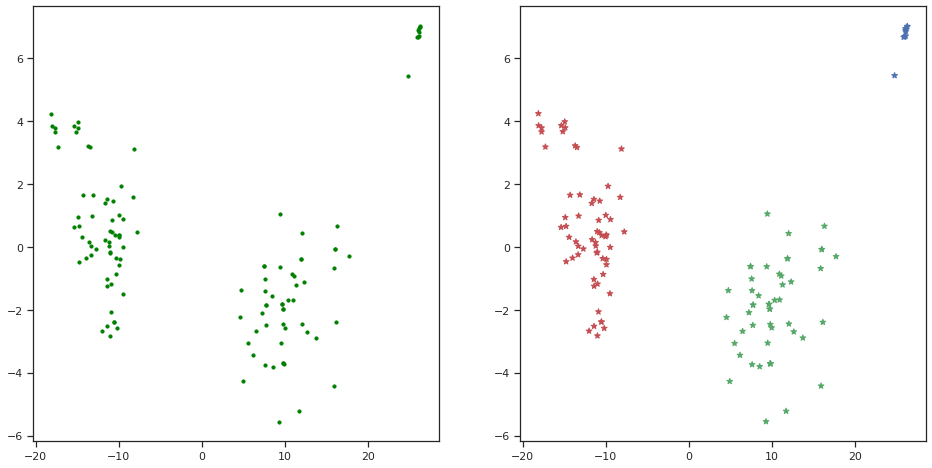

In [14]:
########## PCA of features for Kmeans
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

In [15]:
X = converted_data
for NumbOfcluster in range(2, 15):
    brc = Birch(branching_factor=10, n_clusters=NumbOfcluster, threshold=0.5, compute_labels=True)
    brc.fit(X) 
    # Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
    #    threshold=0.5)
    ClusterBirch = brc.predict(X)
    print("Birch Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, ClusterBirch, metric='sqeuclidean'))


Birch Silhouette Coefficient: 0.809
Birch Silhouette Coefficient: 0.790
Birch Silhouette Coefficient: 0.471
Birch Silhouette Coefficient: 0.329
Birch Silhouette Coefficient: 0.316
Birch Silhouette Coefficient: 0.344
Birch Silhouette Coefficient: 0.361
Birch Silhouette Coefficient: 0.372
Birch Silhouette Coefficient: 0.383
Birch Silhouette Coefficient: 0.400
Birch Silhouette Coefficient: 0.309
Birch Silhouette Coefficient: 0.318
Birch Silhouette Coefficient: 0.331


In [16]:
########Birch Clustering
NumbOfcluster = 3
brc = Birch(branching_factor=10, n_clusters=NumbOfcluster, threshold=0.5, compute_labels=True)
brc.fit(X) 
# Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
#    threshold=0.5)
ClusterBirch = brc.predict(X)
print("Birch Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, ClusterBirch, metric='sqeuclidean'))

Birch Silhouette Coefficient: 0.790


In [17]:
df1 = []
for i in range(NumbOfcluster):
    newdata = X[ClusterBirch==i]
    print('Label of ',i ,' has ', len(newdata[:,0])/len(X[:,0])," ratio of whole data")
    cluster = []


Label of  0  has  0.5083333333333333  ratio of whole data
Label of  1  has  0.4166666666666667  ratio of whole data
Label of  2  has  0.075  ratio of whole data


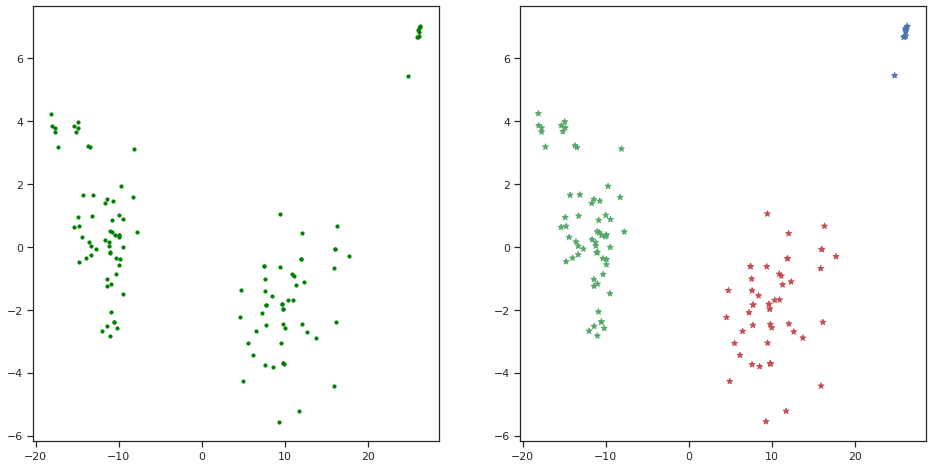

In [18]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[ClusterBirch], marker='*')

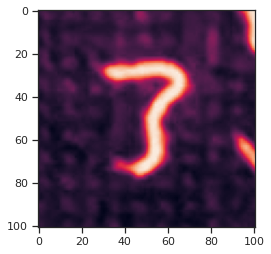

In [42]:
z = (imgList[11]).reshape(101,101)
plt.imshow(z)

In [28]:
ClusterBirch

array([0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [44]:
clusteringResult = pd.DataFrame(imgList)
clusteringResult['ClusterBirch'], clusteringResult["kmeanLabels"] = ClusterBirch, kmean.labels_
clusteringResult.to_excel('clusteringResult.xlsx', index=False)


In [45]:
clusteringResult.head()

,0,1,2,3,4,5,6,7,8,9,...,10193,10194,10195,10196,10197,10198,10199,10200,ClusterBirch,kmeanLabels
0,0.396078,0.403922,0.411765,0.419608,0.419608,0.423529,0.427451,0.427451,0.427451,0.427451,...,0.447059,0.462745,0.482353,0.498039,0.505882,0.505882,0.474510,0.454902,0,1
1,0.419608,0.415686,0.407843,0.403922,0.403922,0.419608,0.439216,0.462745,0.498039,0.525490,...,0.431373,0.411765,0.392157,0.380392,0.372549,0.384314,0.384314,0.388235,0,1
2,0.396078,0.403922,0.411765,0.419608,0.419608,0.423529,0.427451,0.427451,0.427451,0.427451,...,0.447059,0.462745,0.482353,0.498039,0.505882,0.505882,0.474510,0.454902,0,1
3,0.615686,0.627451,0.627451,0.627451,0.631373,0.635294,0.639216,0.643137,0.631373,0.619608,...,0.631373,0.631373,0.631373,0.631373,0.643137,0.650980,0.658824,0.662745,1,0
4,0.603922,0.600000,0.596078,0.596078,0.596078,0.600000,0.600000,0.603922,0.603922,0.607843,...,0.611765,0.619608,0.619608,0.619608,0.615686,0.615686,0.611765,0.611765,1,0


## Part B: (40 points)
You are given a labelled data set for 120 instances (examples)and the corresponding class for each instance. Each instance in the data set has 10201 features as shown below. Label 0 implies the image does not contain a worm and 1 corresponds to that image containing a worm. The goal is to develop a machine learning model based on logistic regression (LR) model, as discussed in class. You can do a 80/20 split for the training & test sets and a 10-fold cross-validation. The results you need to show are the confusion matrices for when the LR model has only the first feature, first ten features and the first 100 features. Also, report the precision, sensitivity and specificity scores for each of the LR model.

In [ ]:
Data

### Confusion Matrix & Evaluation Measures:
Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. From the confusion matrix you can obtain measures such as, precision, sensitivity, and specificity (Feel free to use online resources to understand the meaning of these measures).
<br>
TP: True Positive
<br>
FP: False Positive
<br>
FN: False Negative
<br>
TN: True Negative

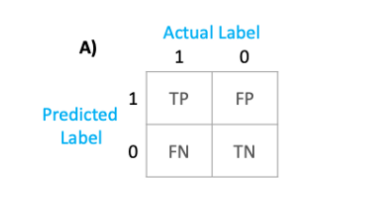

When executed correctly, the code below will provide the confusion matrix for the given inputs.

In [ ]:
# from sklearn import metrics
# cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib


import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter

from sklearn.decomposition import PCA
# from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, precision_score, roc_auc_score,\
auc, precision_recall_curve, roc_curve
from sklearn.model_selection import KFold

from scipy.stats import sem, t
from scipy import mean

In [2]:
data = pd.read_excel('Problem 2- Data.xlsx').drop(['Unnamed: 0'], axis=1)
print(data.shape)
data.head()

(120, 10202)


,Labels,0,1,2,3,4,5,6,7,8,...,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200
0,1,-0.143007,-0.134575,-0.125294,-0.117614,-0.119118,-0.116078,-0.112614,-0.112810,-0.113431,...,-0.104085,-0.099542,-0.082974,-0.068203,-0.051111,-0.037712,-0.030654,-0.030882,-0.060980,-0.079967
1,1,-0.052810,-0.044379,-0.042941,-0.043105,-0.032843,-0.037647,-0.045948,-0.050065,-0.054608,...,-0.064869,-0.052484,-0.051601,-0.056438,-0.066797,-0.084771,-0.093399,-0.097549,-0.092353,-0.083889
2,0,0.056993,0.049739,0.047255,0.047092,0.045588,0.048627,0.044248,0.044052,0.043431,...,0.037092,0.037712,0.038595,0.049444,0.062614,0.076013,0.079150,0.078922,0.072353,0.061209
3,0,0.033464,0.022288,0.031569,0.047092,0.053431,0.044706,0.028562,0.024444,0.019902,...,0.084150,0.073007,0.069967,0.065131,0.062614,0.068170,0.071307,0.078922,0.080196,0.084739
4,0,0.064837,0.061503,0.059020,0.058856,0.057353,0.060392,0.059935,0.063660,0.063039,...,0.080229,0.076928,0.081732,0.088660,0.086144,0.083856,0.079150,0.078922,0.076275,0.076895


In [3]:
col = data.columns

In [4]:
count = Counter(data['Labels'])
count

Counter({1: 39, 0: 81})

# Feature reduction

[0.75717627 0.79062285 0.81018248 0.82664951 0.84018474 0.85194581
 0.86102565 0.86899497 0.8759736  0.88240052 0.88819164 0.89302253
 0.8978319  0.90237866 0.90656498 0.91064823 0.9143884  0.9177282
 0.92104944 0.92430411 0.92730765 0.93007968 0.93277936 0.93525809
 0.93769272 0.94008454 0.9422828  0.94440352 0.94645408 0.94841325
 0.9502718  0.95210484 0.95377807 0.9554267  0.95699112 0.95853792
 0.95997352 0.96140361 0.96280836 0.96412879 0.96535308 0.96655948
 0.96774552 0.96888968 0.97001446 0.97105722 0.97206422 0.97306417
 0.97405465 0.97501342 0.97593007 0.97684494 0.97770944 0.97853661
 0.97934874 0.98015439 0.98092568 0.98168287 0.98239952 0.98310119
 0.98377416 0.98443435 0.9850739  0.98569467 0.98629012 0.98687143
 0.98744017 0.98799888 0.98853417 0.9890461  0.98954557 0.99001438
 0.99047525 0.99091698 0.99135364 0.9917783  0.99219815 0.99260672
 0.993006   0.99338789 0.9937456  0.99409545 0.99444113 0.99477058
 0.99507931 0.99537998 0.99567793 0.99596901 0.99624363 0.99651

Text(0, 0.5, 'cumulative explained variance')

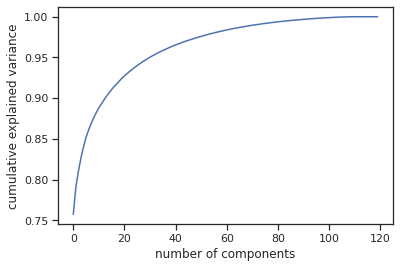

In [5]:

pca = PCA().fit(data)

print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


/home/amin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


12
[[6.11306404e-01 3.88693596e-01]
 [9.99138017e-01 8.61982782e-04]
 [9.86714671e-01 1.32853290e-02]
 [9.64657424e-01 3.53425758e-02]
 [7.05302672e-01 2.94697328e-01]
 [8.32986130e-01 1.67013870e-01]
 [2.89262714e-02 9.71073729e-01]
 [9.81024174e-01 1.89758258e-02]
 [9.99499942e-01 5.00058009e-04]
 [1.00000000e+00 3.11125058e-10]
 [9.91531441e-01 8.46855916e-03]
 [9.99961056e-01 3.89439362e-05]]
[[9 2]
 [0 1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



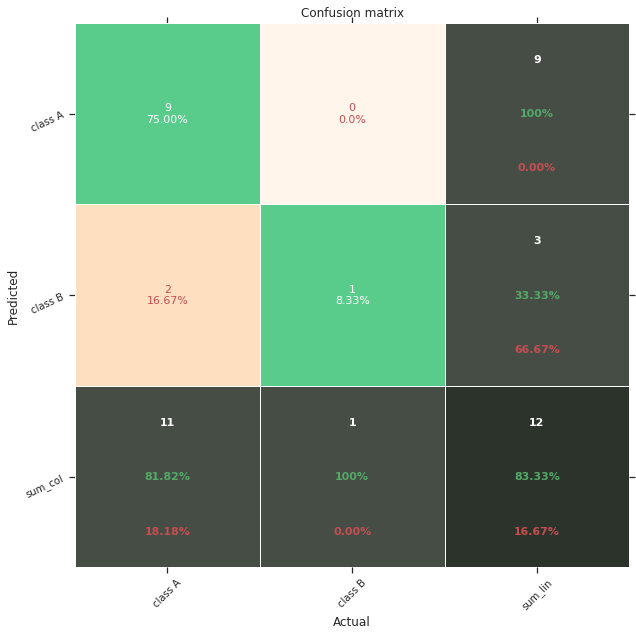

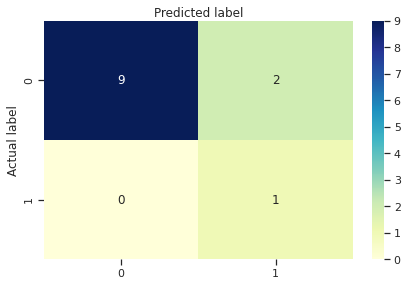

12
[[9.49959956e-01 5.00400441e-02]
 [8.26215905e-01 1.73784095e-01]
 [5.55772277e-01 4.44227723e-01]
 [9.97824944e-01 2.17505597e-03]
 [9.99038106e-01 9.61893894e-04]
 [3.10343223e-01 6.89656777e-01]
 [9.99049489e-01 9.50510571e-04]
 [9.76388239e-01 2.36117611e-02]
 [8.75963492e-01 1.24036508e-01]
 [9.99038106e-01 9.61893894e-04]
 [9.99948105e-01 5.18950062e-05]
 [9.65621216e-01 3.43787840e-02]]
[[9 2]
 [0 1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



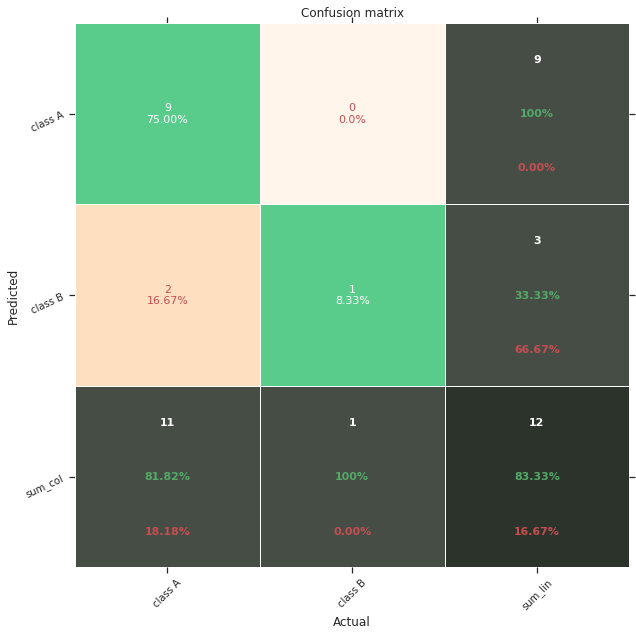

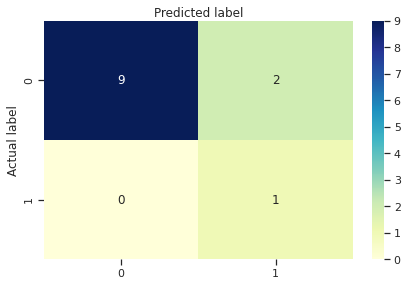

12
[[1.00000000e+00 2.30186919e-11]
 [4.48794937e-01 5.51205063e-01]
 [7.42796069e-01 2.57203931e-01]
 [3.50109594e-02 9.64989041e-01]
 [9.97629695e-01 2.37030546e-03]
 [2.15818207e-01 7.84181793e-01]
 [8.51090638e-01 1.48909362e-01]
 [9.94730937e-01 5.26906256e-03]
 [9.95491469e-01 4.50853122e-03]
 [6.39367396e-01 3.60632604e-01]
 [9.99926829e-01 7.31713208e-05]
 [9.98966761e-01 1.03323942e-03]]
[[8 1]
 [2 1]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.33      0.50      0.40         2

    accuracy                           0.75        12
   macro avg       0.61      0.65      0.62        12
weighted avg       0.80      0.75      0.77        12



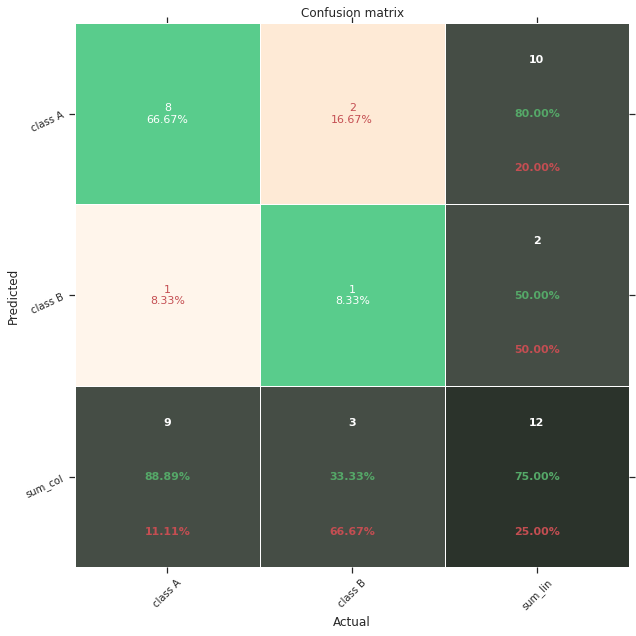

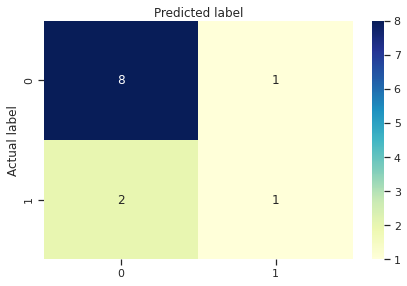

12
[[0.91942064 0.08057936]
 [0.98911874 0.01088126]
 [0.97339554 0.02660446]
 [0.10128376 0.89871624]
 [0.0871595  0.9128405 ]
 [0.18946331 0.81053669]
 [0.97551366 0.02448634]
 [0.74751704 0.25248296]
 [0.83567744 0.16432256]
 [0.97768663 0.02231337]
 [0.98686744 0.01313256]
 [0.99448458 0.00551542]]
[[7 2]
 [3 0]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.00      0.00      0.00         2

    accuracy                           0.58        12
   macro avg       0.39      0.35      0.37        12
weighted avg       0.65      0.58      0.61        12



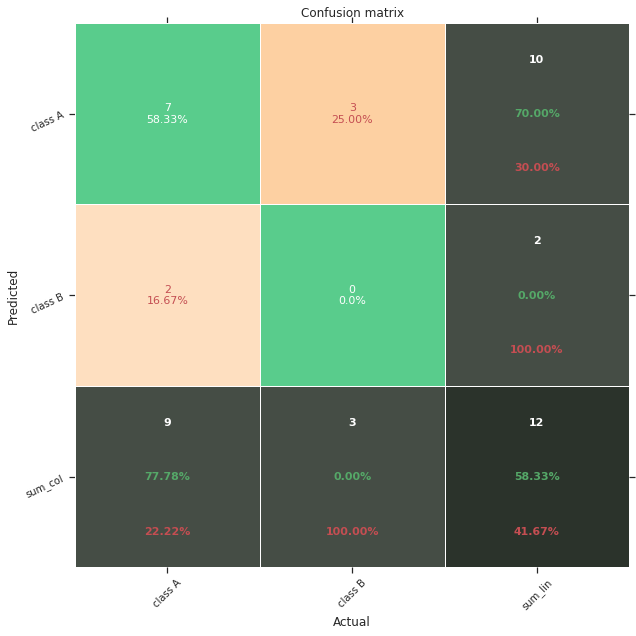

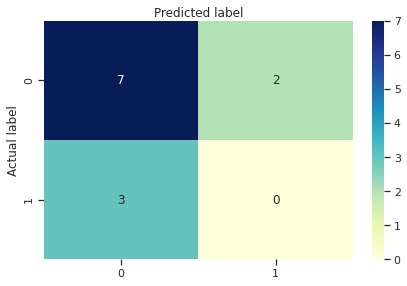

12
[[9.96886311e-01 3.11368930e-03]
 [1.00000000e+00 5.64555639e-11]
 [1.25359739e-01 8.74640261e-01]
 [2.76614798e-02 9.72338520e-01]
 [1.73792264e-01 8.26207736e-01]
 [7.01719180e-02 9.29828082e-01]
 [9.25373063e-01 7.46269369e-02]
 [3.67096170e-02 9.63290383e-01]
 [9.16409797e-03 9.90835902e-01]
 [9.57658806e-01 4.23411938e-02]
 [9.99838782e-01 1.61217542e-04]
 [5.69022651e-01 4.30977349e-01]]
[[5 1]
 [2 4]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



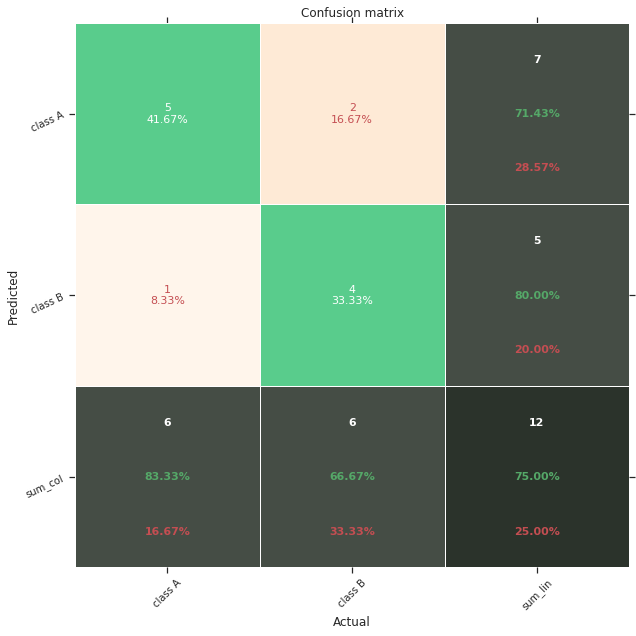

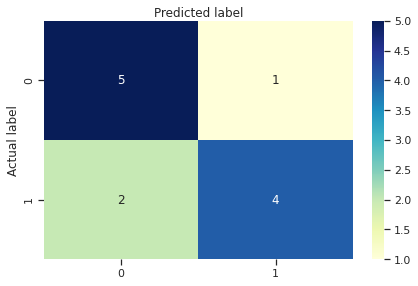

12
[[9.78222791e-01 2.17772093e-02]
 [5.06027449e-01 4.93972551e-01]
 [7.76589529e-01 2.23410471e-01]
 [9.99964750e-01 3.52496072e-05]
 [9.64777038e-01 3.52229622e-02]
 [9.01686957e-01 9.83130435e-02]
 [2.77690735e-01 7.22309265e-01]
 [6.13797939e-01 3.86202061e-01]
 [1.43711891e-01 8.56288109e-01]
 [9.42232200e-01 5.77677996e-02]
 [9.96792290e-01 3.20770958e-03]
 [9.40471770e-01 5.95282301e-02]]
[[6 4]
 [0 2]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.33      0.50         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12



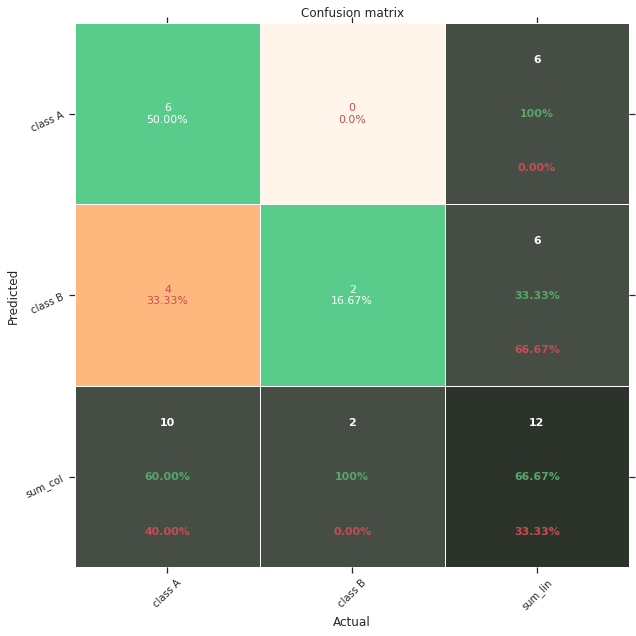

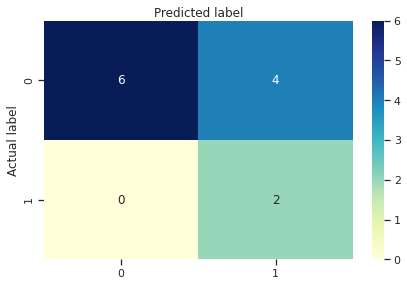

12
[[5.15834337e-02 9.48416566e-01]
 [9.55071200e-01 4.49288003e-02]
 [2.36369300e-02 9.76363070e-01]
 [9.64800211e-01 3.51997894e-02]
 [8.59717669e-01 1.40282331e-01]
 [9.96937942e-01 3.06205831e-03]
 [5.33300681e-01 4.66699319e-01]
 [9.99991019e-01 8.98137045e-06]
 [9.43264688e-01 5.67353118e-02]
 [8.75051528e-01 1.24948472e-01]
 [9.99547654e-01 4.52346113e-04]
 [9.82207732e-01 1.77922675e-02]]
[[7 3]
 [0 2]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.40      0.57         5

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12



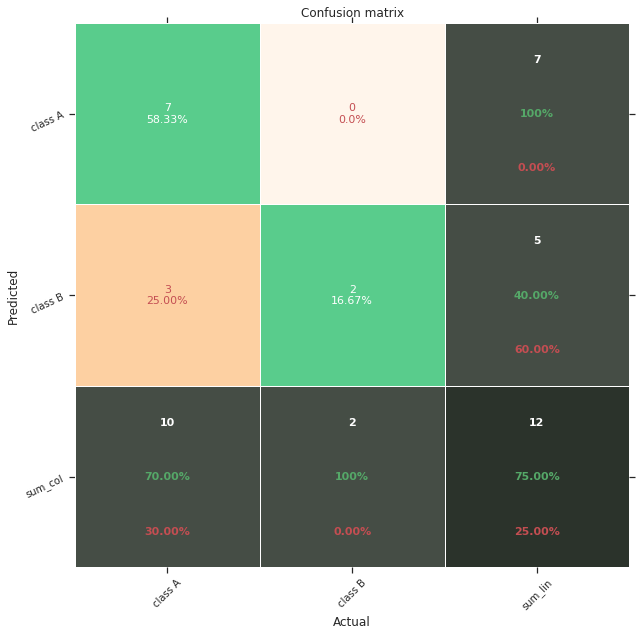

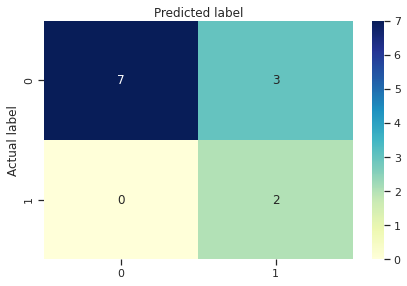

12
[[7.95962772e-02 9.20403723e-01]
 [1.00000000e+00 9.64755237e-11]
 [9.57764217e-01 4.22357827e-02]
 [1.62496209e-01 8.37503791e-01]
 [9.99987006e-01 1.29943004e-05]
 [9.99087349e-01 9.12651492e-04]
 [9.99694909e-01 3.05090806e-04]
 [9.94798269e-01 5.20173117e-03]
 [9.99999999e-01 5.72597872e-10]
 [9.95054997e-01 4.94500298e-03]
 [9.97551013e-01 2.44898707e-03]
 [9.98652895e-01 1.34710504e-03]]
[[10  0]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



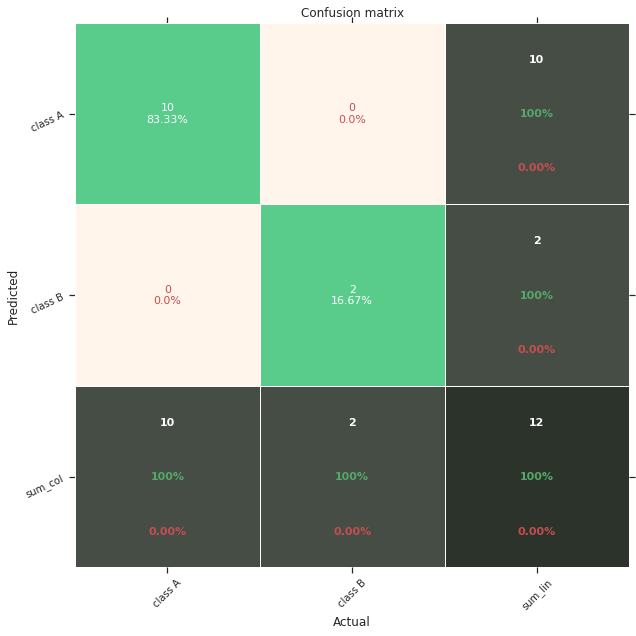

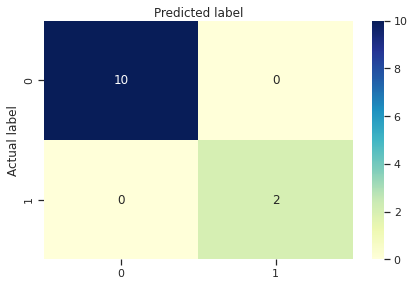

12
[[3.22033052e-02 9.67796695e-01]
 [1.00000000e+00 1.54120205e-10]
 [1.00000000e+00 1.27717818e-10]
 [9.57447595e-01 4.25524053e-02]
 [9.74020844e-01 2.59791556e-02]
 [9.46824917e-03 9.90531751e-01]
 [9.40144764e-03 9.90598552e-01]
 [1.99107529e-02 9.80089247e-01]
 [1.77851852e-01 8.22148148e-01]
 [9.99999700e-01 3.00233534e-07]
 [1.52640174e-01 8.47359826e-01]
 [9.99636490e-01 3.63509808e-04]]
[[6 0]
 [1 5]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



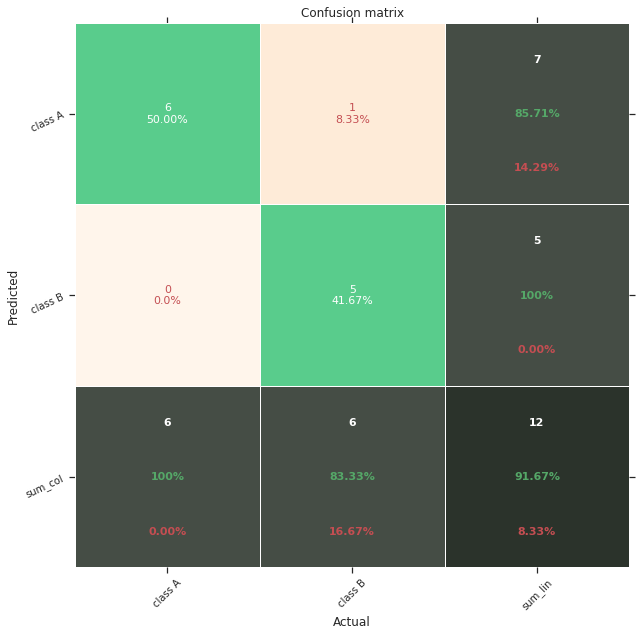

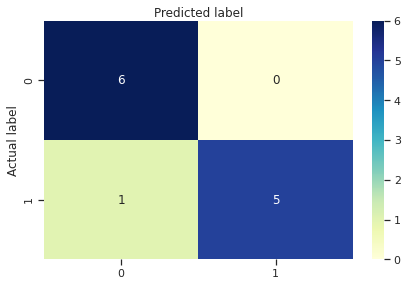

12
[[4.84518629e-01 5.15481371e-01]
 [3.29316627e-01 6.70683373e-01]
 [1.00000000e+00 2.71845278e-11]
 [8.21450540e-01 1.78549460e-01]
 [1.00000000e+00 1.42972611e-10]
 [7.93409102e-01 2.06590898e-01]
 [9.99992361e-01 7.63871228e-06]
 [9.99215320e-01 7.84679509e-04]
 [2.60552962e-02 9.73944704e-01]
 [8.20631814e-01 1.79368186e-01]
 [9.99393912e-01 6.06087750e-04]
 [4.13904784e-02 9.58609522e-01]]
[[6 2]
 [0 4]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



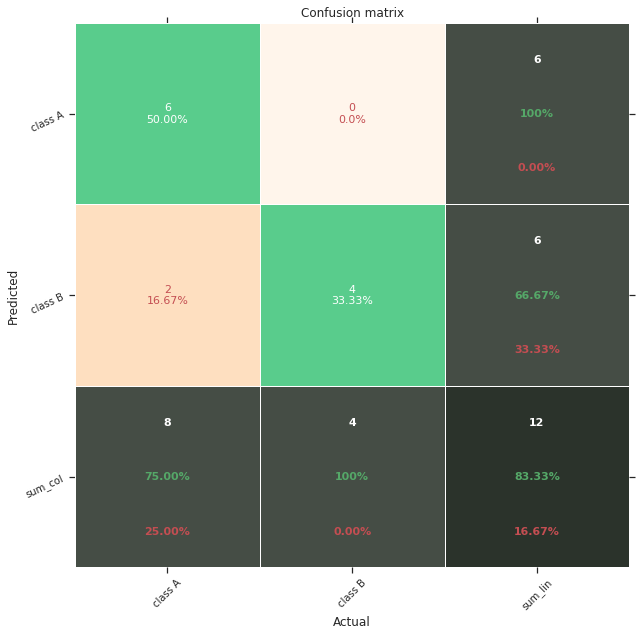

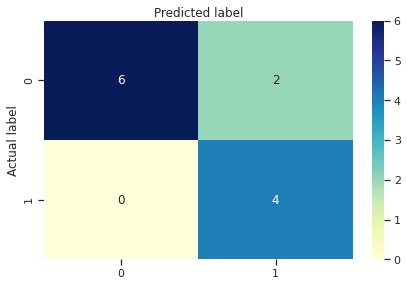

0.8971428571428571


In [22]:
## 10 fold-CV

aucList = []
kfold = KFold(10, True, 1)
sensitivityList = []
specificityList = []
# enumerate splits
K_foldPredicts = []
numberPCA = 100
for train, test in kfold.split(data['Labels']):
    trainData = data.iloc[train,1:]
    trainLabel = list(data.iloc[train,0])
    testLabel =  list(data.iloc[test,0])
    testData = data.iloc[test,1:]
    
    print(len(testLabel))
    predicList = []

    # Feature reduction
    pca_model = PCA(n_components=numberPCA)
    trainData_PCA = pca_model.fit_transform(trainData)
    testData_PCA = pca_model.transform(testData)
    
    # Training data
    model = LogisticRegression()
    model = model.fit(trainData_PCA, np.array(trainLabel))
        
    predicList = np.array(model.predict_proba(testData_PCA))

    print(predicList)
    fpr, tpr, thr = roc_curve(testLabel, predicList[:,1])
    auc_val = auc(fpr, tpr)
    aucList.append(auc_val)
    K_foldPredicts.append(predicList[:,1])
    predicts1 = []
#     auc_val
    for a in predicList[:,1]:
        if a >=.5:
            predicts1.append(1)
        else:
            predicts1.append(0)

    cm = confusion_matrix(list(predicts1), testLabel)
    print(cm)

    CR = classification_report(testLabel,list(predicts1))
    print(CR)
    from confusion_matrix_pretty_print import plot_confusion_matrix_from_data
    plot_confusion_matrix_from_data(list(predicts1), testLabel)
    plt.show()
    
    #matplotlib inline
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


#     #### Roc Curve
#     fpr, tpr, _ = roc_curve(testLabel, predicList[:,1])
#     auc1 = roc_auc_score(testLabel, predicList[:,1])
#     plt.plot(fpr,tpr,label="AUC = "+str(auc1))
#     plt.legend(loc=4)
#     plt.show()
    sensitivityList.append(np.mean(tpr))
    specificityList.append(1-np.mean(fpr))
#     break
print(np.mean(aucList))
#     print('train: %s, test: %s' % (data.iloc[train,2:], data.iloc[test,2:]))

In [26]:
np.mean(specificityList)
# specificityList

0.7199852607709751

In [27]:
np.mean(sensitivityList)


0.5575595238095238

In [28]:
confidence = 0.95
# data = [1, 2, 3, 4, 5]

naucList = len(aucList)
maucList = np.mean(aucList)
std_erraucList = sem(aucList)
haucList = std_erraucList * t.ppf((1 + confidence) / 2, naucList - 1)

sensitivityList = [x.mean() for x in sensitivityList]

nsensitivityList = len(sensitivityList)
msensitivityList = mean(sensitivityList)
std_errsensitivityList = sem(sensitivityList)
hsensitivityList = std_errsensitivityList * t.ppf((1 + confidence) / 2, nsensitivityList  - 1)


specificityList = [x.mean() for x in specificityList]
nspecificityList = len(specificityList)
mspecificityList = mean(specificityList)
std_errspecificityList = sem(specificityList)
hspecificityList = std_errspecificityList * t.ppf((1 + confidence) / 2, nspecificityList  - 1)



print("AUC:         "+ str(round(maucList,2)) + '  -+' + str(round(haucList,4)), '\nSensitivity: '+\
      str(round(msensitivityList,2)) + '  -+' + str(round(hsensitivityList,4)),\
      '\nSpecificity: ' + str(round(mspecificityList,2)) + '  -+' + str(round(hspecificityList,4)))

AUC:         0.9  -+0.0756 
Sensitivity: 0.56  -+0.062 
Specificity: 0.72  -+0.0332


/tmp/ipykernel_16270/1752202713.py:12: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  msensitivityList = mean(sensitivityList)
/tmp/ipykernel_16270/1752202713.py:19: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mspecificityList = mean(specificityList)


[[9.97667870e-01 2.33212989e-03]
 [9.97117396e-01 2.88260355e-03]
 [9.90210777e-01 9.78922307e-03]
 [9.69489174e-02 9.03051083e-01]
 [4.57530957e-01 5.42469043e-01]
 [9.99710450e-01 2.89550179e-04]
 [9.58266018e-01 4.17339816e-02]
 [9.99999997e-01 2.51027104e-09]
 [1.07099713e-01 8.92900287e-01]
 [2.32112926e-01 7.67887074e-01]
 [6.61953449e-01 3.38046551e-01]
 [9.88647770e-01 1.13522302e-02]
 [9.99999998e-01 2.17282298e-09]
 [1.27659135e-02 9.87234086e-01]
 [9.82845033e-01 1.71549666e-02]
 [3.71862562e-01 6.28137438e-01]
 [2.48110390e-01 7.51889610e-01]
 [2.32112926e-01 7.67887074e-01]
 [8.95409444e-01 1.04590556e-01]
 [9.90096883e-01 9.90311653e-03]
 [8.43532619e-01 1.56467381e-01]
 [9.47459237e-01 5.25407629e-02]
 [5.02259842e-01 4.97740158e-01]
 [9.99894429e-01 1.05570806e-04]]
[[16  0]
 [ 3  5]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.62      1.00      0.77         5

    accuracy            

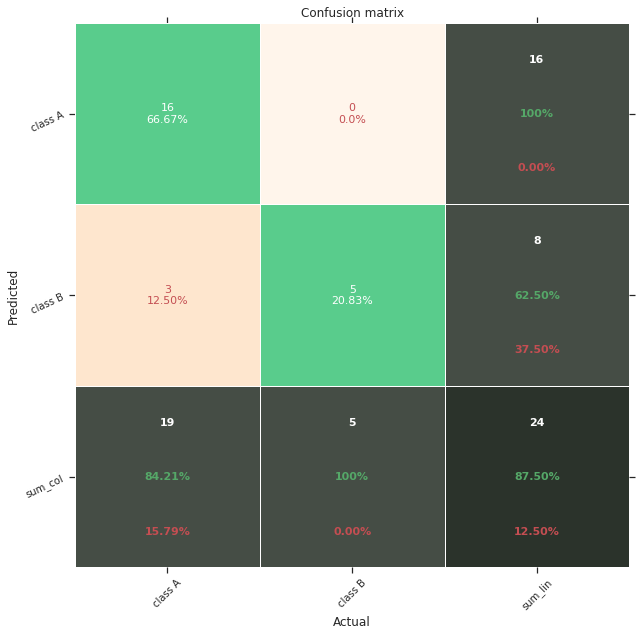

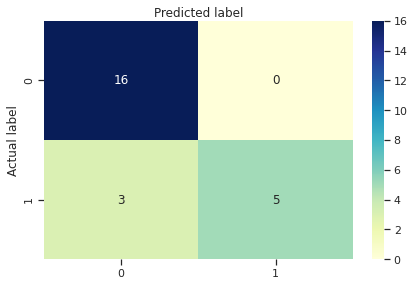

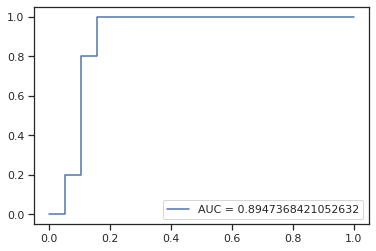

In [36]:
from sklearn.model_selection import train_test_split

trainData, testData, trainLabel, testLabel = train_test_split(  data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=42)
numberPCA = 10
# Feature reduction
pca_model = PCA(n_components=numberPCA)
trainData_PCA = pca_model.fit_transform(trainData)
testData_PCA = pca_model.transform(testData)

model = LogisticRegression()
model = model.fit(trainData_PCA, np.array(trainLabel))

predicList = np.array(model.predict_proba(testData_PCA))

print(predicList)
fpr, tpr, thr = roc_curve(testLabel, predicList[:,1])
auc_val = auc(fpr, tpr)
aucList.append(auc_val)
K_foldPredicts.append(predicList[:,1])
predicts1 = []
#     auc_val
for a in predicList[:,1]:
    if a >=.5:
        predicts1.append(1)
    else:
        predicts1.append(0)

cm = confusion_matrix(np.array(predicts1), np.array(testLabel))
print(cm)

CR = classification_report(list(testLabel),list(predicts1))
print(CR)
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data
plot_confusion_matrix_from_data(list(testLabel),list(predicts1))
plt.show()

#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


#### Roc Curve
fpr, tpr, _ = roc_curve(testLabel, predicList[:,1])
auc1 = roc_auc_score(testLabel, predicList[:,1])
plt.plot(fpr,tpr,label="AUC = "+str(auc1))
plt.legend(loc=4)
plt.show()

In [32]:
testLabel

44     0
47     0
4      0
55     1
26     1
64     0
73     0
10     0
40     0
107    1
18     0
62     0
11     0
36     0
89     0
91     0
109    1
0      1
88     0
104    0
65     0
45     0
31     0
70     0
Name: Labels, dtype: int64